<a href="https://colab.research.google.com/github/Aashrut/Machine-Learning/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [2]:
# Imports Required Libraries
import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score,roc_auc_score,classification_report,auc
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# load persons Dataset
df = pd.read_csv('adult.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


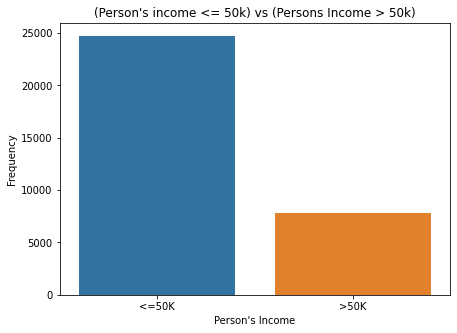

In [3]:
#Data Visualisation
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='income', data=df)
_ = plt.title('(Person\'s income <= 50k) vs (Persons Income > 50k)')
_ = plt.xlabel('Person\'s Income')
_ = plt.ylabel('Frequency')

In [4]:
#More Data Visualisation
#p=sns.pairplot(df, hue = 'income')

In [5]:
df["workclass"] = df["workclass"].replace('?','unknown')
df["occupation"] = df["occupation"].replace('?','unknown')

#drop two irrelevant features
df =df.drop(["native.country"], axis =1)

In [6]:
# get the dummy variables from te workclass feature
dummies = pd.get_dummies(df.workclass)
    
# Concatenate the dummies to the original dataframe
merged = pd.concat([df, dummies], axis='columns')

# drop the workclass features as it is not needed anymore
df=merged.drop(columns=['workclass'])

# print the dataframe info for verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   fnlwgt            32561 non-null  int64 
 2   education         32561 non-null  object
 3   education.num     32561 non-null  int64 
 4   marital.status    32561 non-null  object
 5   occupation        32561 non-null  object
 6   relationship      32561 non-null  object
 7   race              32561 non-null  object
 8   sex               32561 non-null  object
 9   capital.gain      32561 non-null  int64 
 10  capital.loss      32561 non-null  int64 
 11  hours.per.week    32561 non-null  int64 
 12  income            32561 non-null  object
 13  Federal-gov       32561 non-null  uint8 
 14  Local-gov         32561 non-null  uint8 
 15  Never-worked      32561 non-null  uint8 
 16  Private           32561 non-null  uint8 
 17  Self-emp-inc

In [7]:
# get the dummy variables from te marital.status feature
dummies = pd.get_dummies(df["marital.status"])

# Concatenate the dummies to the original dataframe
merged = pd.concat([df, dummies], axis='columns')

# drop the education features as it is not neded anymore
df=merged.drop(columns=['marital.status'])

In [8]:
# get the dummy variables from te occupation feature
dummies = pd.get_dummies(df.occupation)

# Concatenate the dummies to the original dataframe
merged = pd.concat([df, dummies], axis='columns')

# drop the education features as it is not neded anymore
df=merged.drop(columns=['occupation'])

In [9]:
# get the dummy variables from te relationship feature
dummies = pd.get_dummies(df.relationship)

# Concatenate the dummies to the original dataframe
merged = pd.concat([df, dummies], axis='columns')

# drop the education features as it is not neded anymore
df=merged.drop(columns=['relationship'])


In [10]:
# get the dummy variables from te race feature
dummies = pd.get_dummies(df.race)

# Concatenate the dummies to the original dataframe
merged = pd.concat([df, dummies], axis='columns')

# drop the education features as it is not neded anymore
df=merged.drop(columns=['race'])


In [11]:
# get the dummy variables from te sex feature
dummies = pd.get_dummies(df.sex)

# Concatenate the dummies to the original dataframe
merged = pd.concat([df, dummies], axis='columns')

# drop the sex features as it is not neded anymore
df=merged.drop(columns=['sex'])


In [12]:
# code the label/outcome to 0 and 1
df["income"] = df["income"].replace('<=50K', 0)
df["income"] = df["income"].replace('>50K', 1)

In [13]:
df["education"] = df["education"].replace('10th', 1)
df["education"] = df["education"].replace('11th', 2)
df["education"] = df["education"].replace('12th', 3)
df["education"] = df["education"].replace('1st-4th', 4)
df["education"] = df["education"].replace('5th-6th', 5)
df["education"] = df["education"].replace('7th-8th', 6)
df["education"] = df["education"].replace('9th', 7)
df["education"] = df["education"].replace('Assoc-acdm', 8)
df["education"] = df["education"].replace('Assoc-voc', 9)
df["education"] = df["education"].replace('Bachelors', 10)
df["education"] = df["education"].replace('Some-college', 11)
df["education"] = df["education"].replace('Prof-school', 12)
df["education"] = df["education"].replace('Masters', 13)
df["education"] = df["education"].replace('HS-grad', 14)
df["education"] = df["education"].replace('Doctorate', 15)
df["education"] = df["education"].replace('Preschool', 16)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    32561 non-null  int64
 1   fnlwgt                 32561 non-null  int64
 2   education              32561 non-null  int64
 3   education.num          32561 non-null  int64
 4   capital.gain           32561 non-null  int64
 5   capital.loss           32561 non-null  int64
 6   hours.per.week         32561 non-null  int64
 7   income                 32561 non-null  int64
 8   Federal-gov            32561 non-null  uint8
 9   Local-gov              32561 non-null  uint8
 10  Never-worked           32561 non-null  uint8
 11  Private                32561 non-null  uint8
 12  Self-emp-inc           32561 non-null  uint8
 13  Self-emp-not-inc       32561 non-null  uint8
 14  State-gov              32561 non-null  uint8
 15  Without-pay            32561 non-nul

In [14]:
#display a corelation matrix that will allow us to notice the imprtant features that are highly correlated with the outcome (i.e., the income in this problem)
# A correlation coefficient close to zero indicates an uncorrelated/marginal feature in relation to the outcome
correlation_matrix = df.corr()
correlation_matrix["income"]

age                      0.234037
fnlwgt                  -0.009463
education                0.090447
education.num            0.335154
capital.gain             0.223329
capital.loss             0.150526
hours.per.week           0.229689
income                   1.000000
Federal-gov              0.059372
Local-gov                0.033091
Never-worked            -0.008259
Private                 -0.078528
Self-emp-inc             0.139467
Self-emp-not-inc         0.030019
State-gov                0.014843
Without-pay             -0.011681
unknown                 -0.078198
Divorced                -0.126995
Married-AF-spouse        0.012061
Married-civ-spouse       0.444696
Married-spouse-absent   -0.042532
Never-married           -0.318440
Separated               -0.074386
Widowed                 -0.064381
Adm-clerical            -0.089986
Armed-Forces            -0.005044
Craft-repair            -0.012576
Exec-managerial          0.214861
Farming-fishing         -0.051925
Handlers-clean

In [15]:
# Prepare the feature vector x and the class vector y 
#x = df.values # INCORRECT : need to drop income 
x = df.drop(['income'], axis=1).values
y = df['income'].values

#scaling the whole dataset
scl = MinMaxScaler() #is it better thn StandardScaler
x = scl.fit_transform(x)

k=1, SSE=100665.00422304912
k=2, SSE=79500.4661585721
k=3, SSE=71602.48788818745
k=4, SSE=67865.22238230314
k=5, SSE=65021.58351581503
k=6, SSE=61272.519285730545


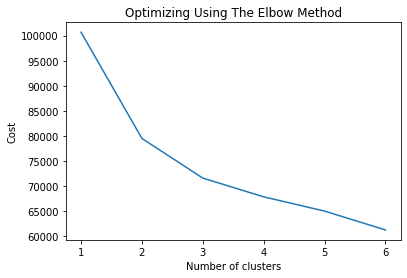

In [209]:
# finding the best K: Elbow method 
sse = [] #n array to store the sum of square error
number_clusters = range(1,7)
for i in range(1, 7):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)    
    sse.append(km.inertia_) # append the intertia: intertia=the sum of squared distance of samples to their closest cluster center
    print('k={}, SSE={}'.format(i, km.inertia_))
  
plt.plot(range(1,7), sse)
plt.title('Optimizing Using The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

In [18]:
# finding the best K: GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

clusters = KMeans(n_clusters=2,random_state=42)

params = {
            'n_clusters': [2, 3, 5, 7,9,11,13,15]
            }
gridcv = GridSearchCV(clusters, params, cv = 10, scoring='accuracy')

#fit the model
gridcv = gridcv.fit(x,y)
gridcv

GridSearchCV(cv=10, estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'n_clusters': [2, 3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [38]:
optimalmodel=gridcv.best_estimator_
print ('best estimator=',optimalmodel)
y_pred=optimalmodel.predict(x)
y_pred

best estimator= KMeans(n_clusters=2, random_state=42)


array([0, 0, 0, ..., 1, 0, 0])

In [39]:
# trasnform assigns for each instance a score per cluster (in our case, two scores)
y_pred=optimalmodel.transform(x)
y_pred

array([[2.47161261, 3.13142783],
       [2.14949519, 2.87394702],
       [2.74825922, 3.339599  ],
       ...,
       [2.07611226, 1.09214504],
       [1.91374206, 2.69238109],
       [1.6420748 , 2.31297143]])

In [42]:
labels=optimalmodel.labels_
labels




array([0, 0, 0, ..., 1, 0, 0])

In [43]:
clusters=optimalmodel.cluster_centers_
clusters


array([[ 2.47044713e-01,  1.21690293e-01,  6.44801470e-01,
         5.94630756e-01,  5.88518078e-03,  1.43223689e-02,
         3.76464983e-01,  2.74528155e-02,  6.37965996e-02,
         3.63957781e-04,  7.29059429e-01,  1.70020278e-02,
         5.12660531e-02,  4.07112775e-02,  4.67945718e-04,
         6.98798939e-02,  2.31009203e-01,  7.27915562e-04,
         8.61540061e-02,  2.17334789e-02,  5.55451568e-01,
         5.32938179e-02,  5.16300109e-02,  1.64040971e-01,
         3.11963812e-04,  8.10585972e-02,  9.69687516e-02,
         2.25653824e-02,  4.78344512e-02,  5.75053294e-02,
         1.43815317e-01,  7.69510737e-03,  1.20937971e-01,
         1.41943535e-02,  1.10591171e-01,  3.00005199e-02,
         3.22362606e-02,  7.02438517e-02,  6.66133815e-15,
         4.31237976e-01,  4.73145115e-02,  2.60853741e-01,
         1.79171216e-01,  8.14225550e-02,  1.12306972e-02,
         3.19242968e-02,  1.27229241e-01,  9.67087818e-03,
         8.19944886e-01,  5.59975043e-01,  4.40024957e-0

In [24]:
# we can assign a new instance to a cluster by using the .predict ()

ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 32561.

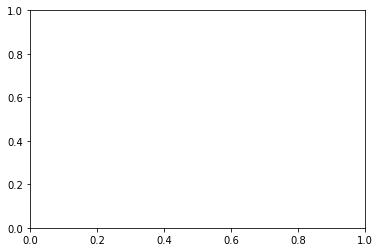

In [37]:


# Plot the data
plt.scatter(x[:,0],
            x[:,1], c=optimalmodel.n_clusters)

# Plot the clusters 
plt.scatter(optimalmodel.cluster_centers_[:, 0], 
            optimalmodel.cluster_centers_[:, 1], 
            s=200,                             # centroid size
            c='red')                           # centroid color
plt.show()
